<a href="https://colab.research.google.com/github/ire-mide1/SmartMeter_Energy_Analysis/blob/main/Data_Analysis_OND2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_ond2 = pd.read_csv('./ATLAST_OND2.csv')

In [ ]:
df_ond2

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,154195,OND002,2021-08-26T11:43:54.426236,0.77,232.73,50.4,0.62,2250.83860,0.003460,179.2021
1,154194,OND002,2021-08-26T11:43:15.602765,0.77,231.40,50.5,0.62,2250.83740,0.003480,178.1780
2,154193,OND002,2021-08-26T11:42:41.083819,0.77,232.26,50.5,0.62,2250.83620,0.003467,178.8402
3,154192,OND002,2021-08-26T11:42:01.580362,0.77,233.26,50.2,0.61,2250.83500,0.003396,179.6102
4,154191,OND002,2021-08-26T11:41:26.878288,0.77,233.83,50.5,0.62,2250.83370,0.003444,180.0491
...,...,...,...,...,...,...,...,...,...,...
12342,92187,OND002,2020-12-20T20:07:29,0.03,192.19,50.2,0.07,0.00262,0.012141,5.7657
12343,92186,OND002,2020-12-20T20:06:52,0.03,196.40,50.0,0.01,0.00262,0.001697,5.8920
12344,92185,OND002,2020-12-20T20:06:15,0.04,199.70,50.4,0.06,0.00262,0.007511,7.9880
12345,92184,OND002,2020-12-20T20:05:37,0.02,199.92,50.2,0.00,0.00261,0.000000,3.9984


In [ ]:
df_ond2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12347 entries, 0 to 12346
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12347 non-null  int64  
 1   meter_id        12347 non-null  object 
 2   timestamp       12347 non-null  object 
 3   current         12347 non-null  float64
 4   voltage         12347 non-null  float64
 5   frequency       12347 non-null  float64
 6   power_factor    12347 non-null  float64
 7   energy          12347 non-null  float64
 8   real_power      12347 non-null  float64
 9   apparent_power  12347 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 964.7+ KB


In [ ]:
df_ond2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,12347.0,118042.840123,16343.389703,92183.00000,105799.500000,114095.000000,125551.000000,154195.000000
current,12347.0,5.164539,10.655815,0.01000,0.520000,0.550000,0.690000,71.560000
voltage,12347.0,224.015906,15.140319,28.06000,218.200000,225.150000,232.830000,265.300000
frequency,12347.0,50.255754,0.168074,50.00000,50.100000,50.300000,50.400000,50.500000
power_factor,12347.0,0.647291,0.180391,0.00000,0.580000,0.600000,0.650000,1.000000
energy,12347.0,566.612614,622.119750,0.00261,67.952185,199.195890,825.769835,2250.838600
real_power,12347.0,0.004116,0.003166,0.00000,0.003191,0.004698,0.005149,0.087792
apparent_power,12347.0,1114.203267,2266.244295,2.03960,117.655100,123.923700,167.945100,16825.187200


In [ ]:
df_ond2.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,154195,OND002,2021-08-26T11:43:54.426236,0.77,232.73,50.4,0.62,2250.8386,0.003460,179.2021
1,154194,OND002,2021-08-26T11:43:15.602765,0.77,231.40,50.5,0.62,2250.8374,0.003480,178.1780
2,154193,OND002,2021-08-26T11:42:41.083819,0.77,232.26,50.5,0.62,2250.8362,0.003467,178.8402
3,154192,OND002,2021-08-26T11:42:01.580362,0.77,233.26,50.2,0.61,2250.8350,0.003396,179.6102
4,154191,OND002,2021-08-26T11:41:26.878288,0.77,233.83,50.5,0.62,2250.8337,0.003444,180.0491


In [ ]:
df_ond2['timestamp'] = pd.to_datetime(df_ond2['timestamp'],
                                      format = '%Y-%m-%dT%H:%M:%S',
                                      errors = 'coerce')

In [ ]:
df_ond2['year'] = df_ond2['timestamp'].dt.year
df_ond2['month'] = df_ond2['timestamp'].dt.month
df_ond2['week'] = df_ond2['timestamp'].dt.week
df_ond2['day'] = df_ond2['timestamp'].dt.day
df_ond2['hour'] = df_ond2['timestamp'].dt.hour
df_ond2['minute'] = df_ond2['timestamp'].dt.minute
df_ond2['second'] = df_ond2['timestamp'].dt.second
df_ond2['day_of_week'] = df_ond2['timestamp'].dt.dayofweek

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_ond2.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,154195,OND002,2021-08-26 11:43:54.426236,0.77,232.73,50.4,0.62,2250.8386,0.003460,179.2021,2021,8,34,26,11,43,54,3
1,154194,OND002,2021-08-26 11:43:15.602765,0.77,231.40,50.5,0.62,2250.8374,0.003480,178.1780,2021,8,34,26,11,43,15,3
2,154193,OND002,2021-08-26 11:42:41.083819,0.77,232.26,50.5,0.62,2250.8362,0.003467,178.8402,2021,8,34,26,11,42,41,3
3,154192,OND002,2021-08-26 11:42:01.580362,0.77,233.26,50.2,0.61,2250.8350,0.003396,179.6102,2021,8,34,26,11,42,1,3
4,154191,OND002,2021-08-26 11:41:26.878288,0.77,233.83,50.5,0.62,2250.8337,0.003444,180.0491,2021,8,34,26,11,41,26,3


In [ ]:
#to check if there is any missing values in your data.the number of missing values will be shown

pd.isnull(df_ond2).sum()

id                0
meter_id          0
timestamp         0
current           0
voltage           0
frequency         0
power_factor      0
energy            0
real_power        0
apparent_power    0
year              0
month             0
week              0
day               0
hour              0
minute            0
second            0
day_of_week       0
dtype: int64

In [ ]:
#convert days_of week to categorical attribute
df_ond2['day_of_week']= df_ond2['day_of_week'].map({1: 'Tuesday' , 2: 'Wednesday',
                                                    3:'Thursday', 4: 'Friday', 5: 'Saturday',
                                                    6: 'Sunday', 7: 'Monday'})
df_ond2.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,154195,OND002,2021-08-26 11:43:54.426236,0.77,232.73,50.4,0.62,2250.8386,0.003460,179.2021,2021,8,34,26,11,43,54,Thursday
1,154194,OND002,2021-08-26 11:43:15.602765,0.77,231.40,50.5,0.62,2250.8374,0.003480,178.1780,2021,8,34,26,11,43,15,Thursday
2,154193,OND002,2021-08-26 11:42:41.083819,0.77,232.26,50.5,0.62,2250.8362,0.003467,178.8402,2021,8,34,26,11,42,41,Thursday
3,154192,OND002,2021-08-26 11:42:01.580362,0.77,233.26,50.2,0.61,2250.8350,0.003396,179.6102,2021,8,34,26,11,42,1,Thursday
4,154191,OND002,2021-08-26 11:41:26.878288,0.77,233.83,50.5,0.62,2250.8337,0.003444,180.0491,2021,8,34,26,11,41,26,Thursday


In [ ]:
#day of the week got more datapoint

df_ond2.groupby('day_of_week').size()

day_of_week
Friday       1152
Saturday     1470
Sunday       3172
Thursday     2065
Tuesday       721
Wednesday    1046
dtype: int64

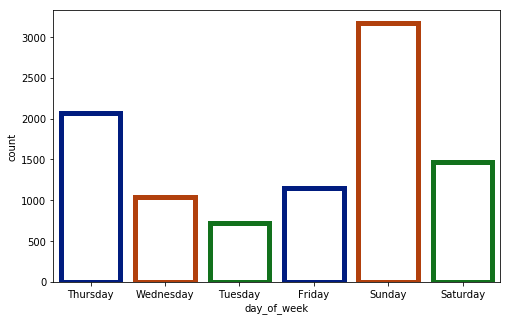

In [ ]:
plt.figure(figsize =(8,5))
sns.countplot(x ='day_of_week', data= df_ond2, orient='h', 
             facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

##Sunday is the day when people use most electricity and the meter reads more data

In [ ]:
df_ond2['week'].unique()

array([34, 33, 31, 29, 28,  7,  6,  5,  3,  2,  1, 53, 52, 51],
      dtype=int64)

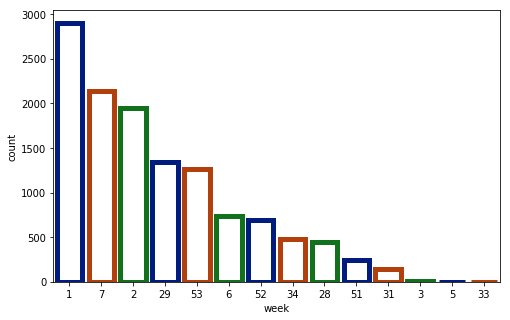

In [ ]:
plt.figure(figsize =(8,5))
sns.countplot(x ='week', data= df_ond2, orient='h', 
              order=df_ond2['week'].value_counts().index,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3))

##The first week of the year has the highest datapoint since it is festive period.

In [ ]:
df_ond2['frequency'].unique()

array([50.4, 50.5, 50.2, 50. , 50.3, 50.1])

In [ ]:
df_ond2['frequency'].mean()

50.25575443427536

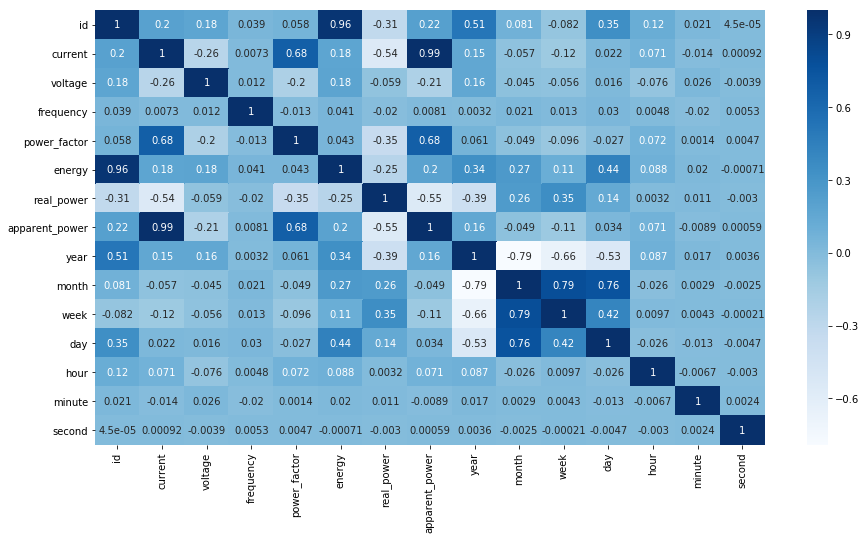

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(df_ond2.corr(), cmap="Blues", annot= True)

## From this visualization, apparent_power highly correlates with current, power_factor.
This means that when current increases both apparent_power and power_factor increase likewise.
However, current doesn't correlate with real_power, frequency and voltage.
In physics, increase in voltage suppose to lead to an increase in current. So there is something wrong here.

In [ ]:
#use groupby and return their exact values..and drop the irrevalant attributes
grouped_df = df_ond2.groupby(['year','month','day',
                              'hour','minute','second'])
grouped_df = grouped_df.first()
grouped_df.drop(labels=['week', 'day_of_week',
                        'timestamp', 'meter_id'],
                axis =1,inplace= True)
grouped_df

id  current  voltage  frequency  \
year month day hour minute second                                        
2020 12    20  20   5      0        92183     0.17   199.13       50.5   
                           37       92184     0.02   199.92       50.2   
                    6      15       92185     0.04   199.70       50.4   
                           52       92186     0.03   196.40       50.0   
                    7      29       92187     0.03   192.19       50.2   
...                                   ...      ...      ...        ...   
2021 8     26  11   41     26      154191     0.77   233.83       50.5   
                    42     1       154192     0.77   233.26       50.2   
                           41      154193     0.77   232.26       50.5   
                    43     15      154194     0.77   231.40       50.5   
                           54      154195     0.77   232.73       50.4   

                                   power_factor      energy  real_power  \
year month day hour minute second                                         
2020 12    20  20   5      0               0.03     0.00261    0.000886   
                           37              0.00     0.00261    0.000000   
                    6      15              0.06     0.00262    0.007511   
                           52              0.01     0.00262    0.001697   
                    7      29              0.07     0.00262    0.012141   
...                                         ...         ...         ...   
2021 8     26  11   41     26              0.62  2250.83370    0.003444   
                    42     1               0.61  2250.83500    0.003396   
                           41              0.62  2250.83620    0.003467   
                    43     15              0.62  2250.83740    0.003480   
                           54              0.62  2250.83860    0.003460   

                                   apparent_power  
year month day hour minute second                  
2020 12    20  20   5      0              33.8521  
                           37              3.9984  
                    6      15              7.9880  
                           52              5.8920  
                    7      29              5.7657  
...                                           ...  
2021 8     26  11   41     26            180.0491  
                    42     1             179.6102  
                           41            178.8402  
                    43     15            178.1780  
                           54            179.2021  

[12347 rows x 8 columns]

In [ ]:
small_data = grouped_df.head() 

In [ ]:
#extract small fraction of random dataset

small_df =grouped_df.sample(frac=0.1)
small_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1235 entries, (2021, 1, 6, 14, 17, 7) to (2020, 12, 20, 21, 53, 6)
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1235 non-null   int64  
 1   current         1235 non-null   float64
 2   voltage         1235 non-null   float64
 3   frequency       1235 non-null   float64
 4   power_factor    1235 non-null   float64
 5   energy          1235 non-null   float64
 6   real_power      1235 non-null   float64
 7   apparent_power  1235 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 86.2 KB


The maximum apparent_power is  15641.529799999998


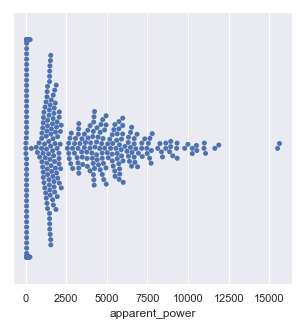

In [ ]:
#there is a data of apparent_power of over 14,000kVA

sns.set(rc= {'figure.figsize': (5,5)})
sns.swarmplot (x= small_df['apparent_power'])
print("The maximum apparent_power is ",small_df['apparent_power'].max())

The apparent power is above 0 to 15641.
The meter read all current or voltage.
As the apparent power =I x V. 

0.0865183978828439


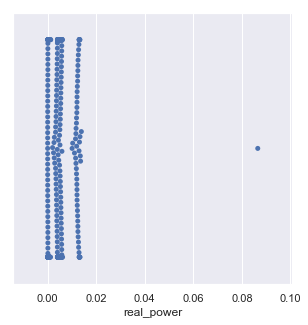

In [ ]:
sns.set(rc= {'figure.figsize': (5,5)})
sns.swarmplot (x= small_df['real_power'])
print(small_df['real_power'].max())

###### The real power is 0 to 0.086. There is an outlier at about 0.086.
The ones with zero shows that some of the meters didnt read any current, voltage or power factor.
As the apparent power =IxV... ANd real_power = pF x KVA.

In [ ]:
count_pF = (df_ond2['power_factor'] == 0.00).sum()
count_pF 

29

In [ ]:
count_current = (df_ond2['current'] == 0.00).sum()
count_current

0

In [ ]:
count_voltage = (df_ond2['voltage'] == 0.00).sum()
count_voltage

0

In [ ]:
count_apparent_power = (df_ond2['apparent_power'] == 0.00).sum()
count_apparent_power

0

In [ ]:
count_real_power = (df_ond2['real_power'] == 0.00).sum()
count_real_power

29

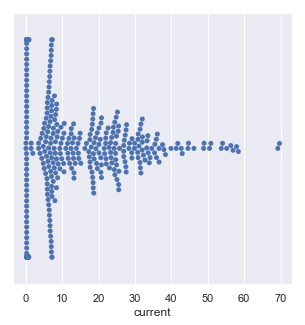

In [ ]:
##current_visualization

sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x= small_df['current'])

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability Density')

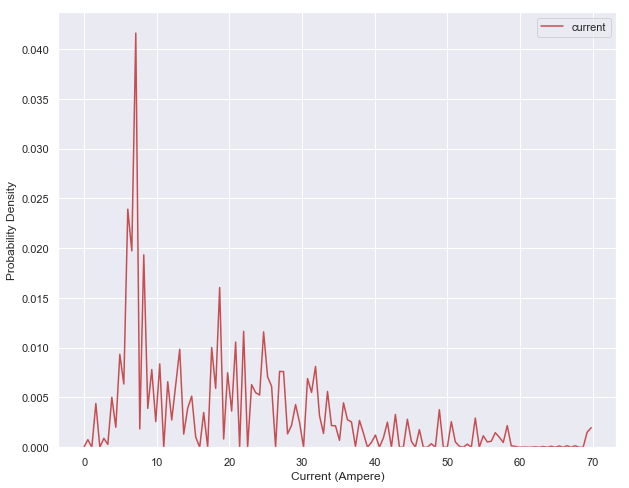

In [ ]:
#This plot explains the current distribution better.

sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(small_df['current'], color='r')
plt.xlabel('Current (Ampere)')
plt.ylabel('Probability Density')

##This plot shows the distribution of current from 0A- 70A.
The current with the highest occurence is around 4A-6A thereabout.
This is a very small current.

Text(0, 0.5, 'Probability Density')

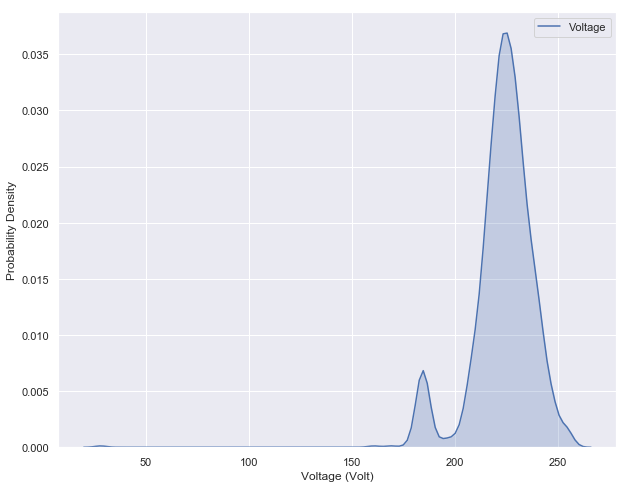

In [ ]:
sns.kdeplot(small_df['voltage'], color='b',
            shade=True, Label='Voltage')
plt.xlabel('Voltage (Volt)')
plt.ylabel('Probability Density')

There are voltage lower than 50V.
We can however see that most of our voltage data is around 200V-250V.

(array([181.,   0., 192.,   0., 199.,   0., 238.,   0., 202., 223.]),
 array([50.  , 50.05, 50.1 , 50.15, 50.2 , 50.25, 50.3 , 50.35, 50.4 ,
        50.45, 50.5 ]),
 <a list of 10 Patch objects>)

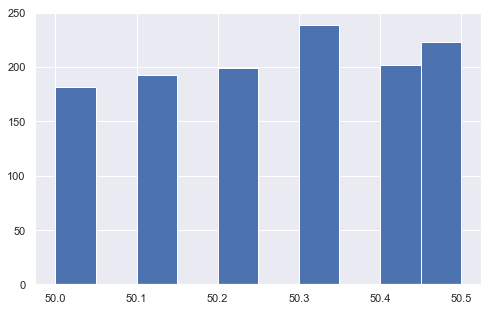

In [ ]:
#plot frequency..from this plot most meters have frequency distrbution of 50hz

plt.figure(figsize= (8,5))
plt.hist(small_df['frequency'], label= 'Frequency')

In [ ]:
print("The average frequency is ", small_df['frequency'].median() )


The average frequency is  50.3
